In [1]:
# autoreload modules
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from b2aiprep.dataset import VBAIDataset

We have reformatted the data into a [BIDS](https://bids-standard.github.io/bids-starter-kit/folders_and_files/folders.html)-like format. The data is stored in a directory with the following structure:

```
data/
    sub-01/
        ses-01/
            beh/
                sub-01_ses-01_questionnaire.json
    sub-02/
        ses-01/
            beh/
                sub-01_ses-01_questionnaire.json
    ...
```

i.e. the data reflects a subject-session-datatype hierarchy. The `beh` subfolder, for behavioural data, was chosen to store questionnaire data as it is the closest approximation to the data collected.

We have provided utilities which load in data from the BIDS-like dataset structure. The only input needed is the folder path which stores the data.

In [6]:

# TODO: allow user to specify input folder input
dataset = VBAIDataset('../output')

In [7]:
# every user has a sessionschema which we can get info for the users from
qs = dataset.load_questionnaires('sessionschema')
q_dfs = []
for subject_id, questionnaire in qs.items():
    # get the dataframe for this questionnaire
    df = dataset.questionnaire_to_dataframe(questionnaire)
    q_dfs.append(df)

# concatenate all the dataframes
sessionschema_df = pd.concat(q_dfs)
sessionschema_df = pd.pivot(sessionschema_df, index='record_id', columns='linkId', values='valueString')
sessionschema_df

linkId,session_duration,session_id,session_is_control_participant,session_site,session_status
record_id,,,,,
02415508-4C9E-40C4-863E-A71BE705A681,2739.0,63C78541-AEE4-4C56-9197-CF887E82E29D,No,VUMC,Completed
0584121F-A5AB-4136-99B4-B175DA8173D2,4109.0,002A8763-6145-4A41-9A7C-0A8485CDD15F,No,USF,Completed
05BEB9A3-5A0B-49E1-B101-AD19AE311C3E,3363.0,71818924-3E14-4C51-B8D0-BEAAF4A5E8D1,No,VUMC,Completed
0B63423B-9409-4D2C-AA15-DEDF7385D8C4,6607.0,B0F9E7A2-3ACF-4015-814A-3E6A31743147,No,Mt. Sinai,Completed
0C151B66-FB47-4E0B-BF7C-D6F597009810,2634.0,CC69BEFE-B011-49F9-B354-0231BB7655D8,No,MIT,Completed
...,...,...,...,...,...
F2CFF415-F410-4B55-BAA6-E8055F8AFA60,2687.0,FD067612-C8E5-4062-9AAB-DB540961D46B,No,VUMC,Completed
F495D33A-387E-4238-8625-08C266545322,3995.0,52595C83-D187-451E-9C5C-08133230D28F,No,VUMC,Completed
F54F8AE7-94DA-4E0C-8C4C-E3758F98FA68,3060.0,443E0D26-2834-450C-B0D4-2E677ABAB8B9,No,MIT,Completed


The above process involves: (1) finding all the questionnaire files for a specific named questionnaire, (2) loading in the data from the JSON files, and (3) concatenating the data into a single dataframe. For convenience, the `load_and_pivot_questionnaire` helper function automatically performs these tasks for a given questionnaire. Let's try it with the demographics dataframe.

In [8]:
import re
demographics_df = dataset.load_and_pivot_questionnaire('demographics')
demographics_df.head()

linkId,children,cognition,country,demographics_completed_by___1,demographics_completed_by___2,demographics_completed_by___3,demographics_duration,demographics_session_id,employ_status___1,employ_status___2,...,race___6,race___7,race___8,self_care,sexual_orientation,specify_gender_identity,spouse_partner_sig_other,state_province,transportation_yn,vision
record_id,,,,,,,,,,,,,,,,,,,,,
02415508-4C9E-40C4-863E-A71BE705A681,No,No,USA,NaN,NaN,NaN,348.0,63C78541-AEE4-4C56-9197-CF887E82E29D,NaN,NaN,...,NaN,NaN,NaN,No,Heterosexual,Cis: same gender as the sex assigned at birth,No,Tennessee,Yes,No
0584121F-A5AB-4136-99B4-B175DA8173D2,No,No,USA,NaN,NaN,NaN,404.0,002A8763-6145-4A41-9A7C-0A8485CDD15F,NaN,NaN,...,NaN,NaN,NaN,No,Heterosexual,Cis: same gender as the sex assigned at birth,Yes,Florida,Yes,No
05BEB9A3-5A0B-49E1-B101-AD19AE311C3E,Yes,No,USA,NaN,NaN,NaN,173.0,71818924-3E14-4C51-B8D0-BEAAF4A5E8D1,NaN,NaN,...,NaN,NaN,NaN,No,Heterosexual,Cis: same gender as the sex assigned at birth,No,Tennessee,Yes,No
0B63423B-9409-4D2C-AA15-DEDF7385D8C4,No,Yes,Canada,NaN,NaN,NaN,1202.0,B0F9E7A2-3ACF-4015-814A-3E6A31743147,NaN,NaN,...,NaN,NaN,NaN,No,Heterosexual,Cis: same gender as the sex assigned at birth,No,Ontario,No,No
0C151B66-FB47-4E0B-BF7C-D6F597009810,No,Yes,USA,NaN,NaN,NaN,149.0,CC69BEFE-B011-49F9-B354-0231BB7655D8,NaN,NaN,...,NaN,NaN,NaN,No,Prefer not to answer,Cis: same gender as the sex assigned at birth,No,MA,No,No


We can iterate through a couple of columns and summarize the data.

In [9]:
for column in ['children', 'country', 'ethnicity', 'gender_identity', 'grandparent', 'housing_status']:
    print(demographics_df[column].value_counts(), end='\n\n')

children
No     94
Yes    17
Name: count, dtype: int64

country
USA       108
Canada      3
Name: count, dtype: int64

ethnicity
Not Hispanic or Latino    96
Hispanic or Latino        13
Prefer not to answer       2
Name: count, dtype: int64

gender_identity
Female gender identity                       72
Male gender identity                         37
Non-binary or genderqueer gender identity     2
Name: count, dtype: int64

grandparent
No    111
Name: count, dtype: int64

housing_status
Own home                                 71
Rent home                                27
Skilled nursing facility/nursing home     2
Assisted living                           1
Name: count, dtype: int64



## Participants dataframe

We can get a dataframe summarizing the participants in the dataset.

In [13]:
participant_df = dataset.load_and_pivot_questionnaire('participant')
participant_df.head()

linkId,record_id,selected_language,enrollment_institution,age,eligible_studies___1,eligible_studies___2,eligible_studies___3,eligible_studies___4,eligible_studies___5,is_control_participant,...,diagnosis_als_treatment_and_management_yes_medications___tofersen,diagnosis_als_treatment_and_management_yes_medications___symptomatic_treatment,diagnosis_als_treatment_and_management_yes_medications___other,diagnosis_als_treatment_and_management_yes_supportive_care___physical_therapy,diagnosis_als_treatment_and_management_yes_supportive_care___occupational_therapy,diagnosis_als_treatment_and_management_yes_supportive_care___speech_therapy,diagnosis_als_treatment_and_management_yes_supportive_care___respiratory_support,diagnosis_als_treatment_and_management_yes_supportive_care___nutrition_support,diagnosis_als_treatment_and_management_yes_supportive_care___psychotherapy,diagnosis_als_treatment_and_management_yes_supportive_care___other
record_id,,,,,,,,,,,,,,,,,,,,,
02415508-4C9E-40C4-863E-A71BE705A681,02415508-4C9E-40C4-863E-A71BE705A681,English,VUMC,46,NaN,NaN,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0584121F-A5AB-4136-99B4-B175DA8173D2,0584121F-A5AB-4136-99B4-B175DA8173D2,English,USF,90 or older,NaN,NaN,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05BEB9A3-5A0B-49E1-B101-AD19AE311C3E,05BEB9A3-5A0B-49E1-B101-AD19AE311C3E,English,VUMC,37,NaN,NaN,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0B63423B-9409-4D2C-AA15-DEDF7385D8C4,0B63423B-9409-4D2C-AA15-DEDF7385D8C4,English,Mt. Sinai,73,NaN,NaN,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0C151B66-FB47-4E0B-BF7C-D6F597009810,0C151B66-FB47-4E0B-BF7C-D6F597009810,English,MIT,22,NaN,NaN,NaN,NaN,NaN,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


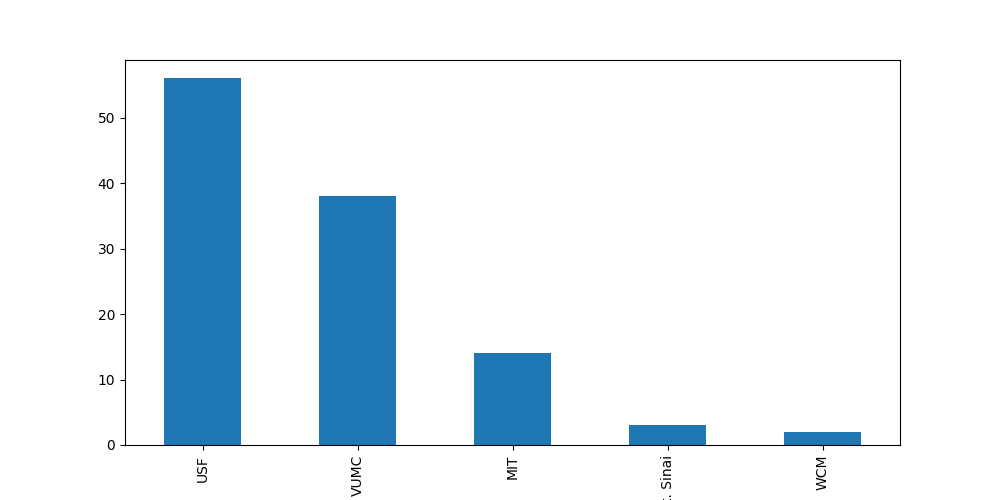

In [15]:
# bar chart of participant by enrollment institution
plt.figure(figsize=(10, 5))
participant_df['enrollment_institution'].value_counts().plot(kind='bar')
plt.show()

## Session data

Load in the `QuestionnaireResponse` objects for the session schema.

In [33]:
session_schema = dataset.load_questionnaires('sessionschema')
# show the first item
record_id = list(session_schema.keys())[0]

# Each element is a QuestionnaireResponse, a pydantic object
# you can serialize it to a python dictionary with .dict()
# and to a json with .json()
# otherwise attributes are accessible like any other python object
print(session_schema[record_id].json(indent=2))

{
  "resourceType": "QuestionnaireResponse",
  "id": "E9A8EDD5-6D9F-4109-AB6C-EC74A461E1F2sessions",
  "questionnaire": "https://kind-lab.github.io/vbai-fhir/Questionnaire-sessionschema",
  "status": "completed",
  "item": [
    {
      "linkId": "session_id",
      "answer": [
        {
          "valueString": "48AEC88C-80ED-4AF6-95CB-39B0AF9BB6B2"
        }
      ]
    },
    {
      "linkId": "session_status",
      "answer": [
        {
          "valueString": "Completed"
        }
      ]
    },
    {
      "linkId": "session_is_control_participant",
      "answer": [
        {
          "valueString": "No"
        }
      ]
    },
    {
      "linkId": "session_duration",
      "answer": [
        {
          "valueString": "3005.0"
        }
      ]
    },
    {
      "linkId": "session_site",
      "answer": [
        {
          "valueString": "USF"
        }
      ]
    }
  ]
}


In [34]:
# helper function which loads in the above as a dataframe
session_df = dataset.load_and_pivot_questionnaire('sessionschema')
session_df.head()

linkId,session_id,session_status,session_is_control_participant,session_duration,session_site
record_id,,,,,
02415508-4C9E-40C4-863E-A71BE705A681,63C78541-AEE4-4C56-9197-CF887E82E29D,Completed,No,2739.0,VUMC
0584121F-A5AB-4136-99B4-B175DA8173D2,002A8763-6145-4A41-9A7C-0A8485CDD15F,Completed,No,4109.0,USF
05BEB9A3-5A0B-49E1-B101-AD19AE311C3E,71818924-3E14-4C51-B8D0-BEAAF4A5E8D1,Completed,No,3363.0,VUMC
0B63423B-9409-4D2C-AA15-DEDF7385D8C4,B0F9E7A2-3ACF-4015-814A-3E6A31743147,Completed,No,6607.0,Mt. Sinai
0C151B66-FB47-4E0B-BF7C-D6F597009810,CC69BEFE-B011-49F9-B354-0231BB7655D8,Completed,No,2634.0,MIT


We can look at a specific questionnaire which is collected for each session in a similar way.

In [ ]:
session_confounders = dataset.load_questionnaires('confounders')
# show the first item
record_id = list(session_confounders.keys())[0]

# Each element is a QuestionnaireResponse, a pydantic object
# you can serialize it to a python dictionary with .dict()
# and to a json with .json()
# otherwise attributes are accessible like any other python object
print(session_confounders[record_id].json(indent=2))

## Acoustic tasks

Let's look at the acoustic tasks now. Acoustic task files are organized in the following way:

```
data/
    sub-01/
        ses-01/
            beh/
                sub-01_ses-01_task-<TaskName>_acoustictaskschema.json
                sub-01_ses-01_task-<TaskName>_rec-<TaskName>-1_recordingschema.json
                ...
```

where `TaskName` is the name of the acoustic task, including:

* `Audio-Check`
* `Cinderalla-Story`
* `Rainbow-Passage`

etc. The audio tasks are listed currently in b2aiprep/prepare.py:_AUDIO_TASKS.

In [30]:
acoustic_tasks = dataset.load_questionnaires('acoustictaskschema')
acoustic_tasks
# show the first item
record_id = list(acoustic_tasks.keys())[0]
print(acoustic_tasks[record_id].json(indent=2))

{
  "resourceType": "QuestionnaireResponse",
  "id": "E9A8EDD5-6D9F-4109-AB6C-EC74A461E1F2acoustic-tasks",
  "questionnaire": "https://kind-lab.github.io/vbai-fhir/Questionnaire-acoustictaskschema",
  "status": "completed",
  "item": [
    {
      "linkId": "acoustic_task_id",
      "answer": [
        {
          "valueString": "2091B7E7-CAE9-45D5-9502-35730F5E721C"
        }
      ]
    },
    {
      "linkId": "acoustic_task_session_id",
      "answer": [
        {
          "valueString": "48AEC88C-80ED-4AF6-95CB-39B0AF9BB6B2"
        }
      ]
    },
    {
      "linkId": "acoustic_task_name",
      "answer": [
        {
          "valueString": "Glides"
        }
      ]
    },
    {
      "linkId": "acoustic_task_cohort",
      "answer": [
        {
          "valueString": "generic"
        }
      ]
    },
    {
      "linkId": "acoustic_task_status",
      "answer": [
        {
          "valueString": "Completed"
        }
      ]
    },
    {
      "linkId": "acoustic_task_

Each row in the above corresponds to a different acoustic task: an audio check, prolonged vowels, etc. The `value_counts()` method for pandas DataFrames lets us count all the unique values for a column.

In [36]:
acoustic_tasks_df = dataset.load_and_pivot_questionnaire('acoustictaskschema')
acoustic_tasks_df.head()

linkId,acoustic_task_id,acoustic_task_session_id,acoustic_task_name,acoustic_task_cohort,acoustic_task_status,acoustic_task_duration
record_id,,,,,,
02415508-4C9E-40C4-863E-A71BE705A681,0B4D0566-8D28-45F7-A2F9-F6A97E1027FE,63C78541-AEE4-4C56-9197-CF887E82E29D,Picture description,generic,Completed,71.0
0584121F-A5AB-4136-99B4-B175DA8173D2,B6365BBB-7604-4941-9B11-70587952AD15,002A8763-6145-4A41-9A7C-0A8485CDD15F,Picture description,generic,Completed,91.0
05BEB9A3-5A0B-49E1-B101-AD19AE311C3E,627AEA16-6ADD-428B-B7E4-B02FD9F65C10,71818924-3E14-4C51-B8D0-BEAAF4A5E8D1,Breath Sounds,respiratory,Completed,491.0
0B63423B-9409-4D2C-AA15-DEDF7385D8C4,0363B388-80A8-4148-A394-FFBC375816DF,B0F9E7A2-3ACF-4015-814A-3E6A31743147,Glides,generic,Completed,113.0
0C151B66-FB47-4E0B-BF7C-D6F597009810,463D72CD-C422-4A7E-BEDF-A81D06DB44B7,CC69BEFE-B011-49F9-B354-0231BB7655D8,Picture description,generic,Completed,80.0


Above will list out all of the acoustic tasks, as every acoustic task is associated with a single "acoustictaskschema" `QuestionnaireResponse` object.

In [37]:
acoustic_tasks_df['acoustic_task_name'].value_counts()

acoustic_task_name
Diadochokinesis           17
Picture description       11
Respiration and cough     10
Prolonged vowel            9
Story recall               9
Glides                     8
Maximum phonation time     8
Audio Check                7
Loudness                   6
Rainbow Passage            6
Voluntary Cough            5
Caterpillar Passage        4
Animal fluency             4
Free Speech                3
Cape V sentences           3
Breath Sounds              2
Word-color Stroop          1
Name: count, dtype: int64